In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Priors based model

In [3]:
n = 1000
a = np.random.normal(0, 10, n)
b = np.random.uniform(0, 1, n)
xbar = 150

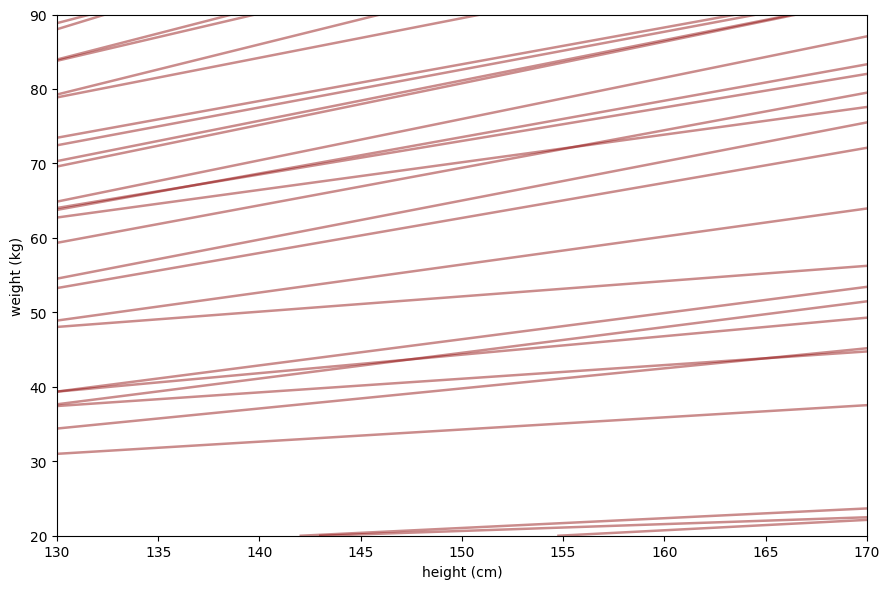

In [4]:
plt.figure(figsize=(9, 6))
plt.xlim(130, 170)
plt.ylim(20, 90)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")
for j in range(50):
    plt.axline(xy1=(0, a[j]), slope=b[j], color='darkred', alpha=0.45, lw=1.8)

plt.tight_layout()
plt.show()

In [22]:
# Simulating a sample of 10 people

In [12]:
import pytensor
pytensor.config.cxx = ""  
import pymc as pm
import arviz as az

In [13]:
H = np.random.uniform(130, 170, 10)

In [14]:
W = 0.5 * H + np.random.normal(0, 5, size=10)

In [15]:
with pm.Model() as m3_1:
    a = pm.Normal('a', mu=0, sigma=10)
    b = pm.Uniform('b', lower=0, upper=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = a + b * H
    
    W_obs = pm.Normal('W_obs', mu=mu, sigma=sigma, observed=W)
    
    trace = pm.sample(1000, tune=1000, return_inferencedata=True, random_seed=93)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, sigma]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.


In [16]:
summary = az.summary(trace, var_names=['a', 'b', 'sigma'], round_to=2)
print(summary)


       mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a     -7.83  9.80  -25.76    10.26       0.35     0.20    781.68    819.77   
b      0.56  0.06    0.45     0.68       0.00     0.00    775.26    886.17   
sigma  5.97  1.47    3.56     8.80       0.05     0.03    712.76    593.66   

       r_hat  
a       1.00  
b       1.00  
sigma   1.01  


In [17]:
# Adding sex factor into regression

In [19]:
def sim_HW(S, b, a):
        
    N = len(S)
    S = np.asarray(S)
    
    H_mean = np.where(S == 1, 150, 160)
    H = H_mean + np.random.normal(0, 5, N)
    
    a_S = np.array(a)[S-1]          
    b_S = np.array(b)[S-1]
    W = a_S + b_S * H + np.random.normal(0, 5, N)
    
    return pd.DataFrame({'S': S, 'H': H, 'W': W})

In [24]:
N = 200
male = 1
female = 2
S = np.random.choice([male, female], N, p=[0.5, 0.5])  

In [27]:
a = [0, 0] 
b = [0.5, 0.5]

df = sim_HW(S, b, a)
print(df.head())

   S           H          W
0  1  150.166023  83.911878
1  2  160.290440  67.306874
2  2  161.390907  75.491013
3  2  157.681410  84.584130
4  1  147.428907  61.561848


In [29]:
print(df.groupby('S')[['H', 'W']].mean().round(2))

        H      W
S               
1  150.96  75.91
2  160.28  78.76
